In [9]:
import numpy as np
import networkx as nx
from sugarscape import SugarscapeG1mt

In [2]:
model = SugarscapeG1mt()

model.run_model()

/home/ketzer/repos/sugarscape/utils.py:26: RuntimeWarning: Mean of empty slice.
  return np.exp(np.log(list_of_prices).mean())
/home/ketzer/.local/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [3]:
results = model.datacollector.get_model_vars_dataframe()

results

,Traders,Trade Volume,Price
0,200,860,1.023947
1,200,182,1.028753
2,200,183,1.127309
3,200,92,1.036058
4,200,117,1.036040
...,...,...,...
995,57,3,1.004649
996,57,6,0.910717
997,57,9,0.984655
998,57,3,0.922528


In [4]:
# retrieve agent level results
agent_results = model.datacollector.get_agent_vars_dataframe()
# filter out Nones from non-trader agents
agent_results

Trade Network  \
Step AgentID                                                      
1    1                                                       []   
     2        [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 126, ...   
     3                                                       []   
     4                                 [2, 2, 2, 2, 2, 2, 2, 2]   
     5        [15, 15, 15, 15, 15, 93, 93, 93, 93, 93, 93, 1...   
...                                                         ...   
1000 180                                                     []   
     183                                                     []   
     185                                                     []   
     190                                                     []   
     192                                                    [5]   

                                                Buyer or seller  
Step AgentID                                                     
1    1                                                       []  
     2        [seller, seller, seller, seller, seller, selle...  
     3                                                       []  
     4        [buyer, buyer, buyer, buyer, buyer, buyer, buy...  
     5        [seller, seller, seller, seller, seller, selle...  
...                                                         ...  
1000 180                                                     []  
     183                                                     []  
     185                                                     []  
     190                                                     []  
     192                                                [buyer]  

[63394 rows x 2 columns]

In [11]:
agent_results["distinct_seller_buyer"] = agent_results.apply(
    lambda x: np.unique(x["Buyer or seller"]), axis = 1
)

In [12]:
agent_results

Trade Network  \
Step AgentID                                                      
1    1                                                       []   
     2        [21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 126, ...   
     3                                                       []   
     4                                 [2, 2, 2, 2, 2, 2, 2, 2]   
     5        [15, 15, 15, 15, 15, 93, 93, 93, 93, 93, 93, 1...   
...                                                         ...   
1000 180                                                     []   
     183                                                     []   
     185                                                     []   
     190                                                     []   
     192                                                    [5]   

                                                Buyer or seller  \
Step AgentID                                                      
1    1                                                       []   
     2        [seller, seller, seller, seller, seller, selle...   
     3                                                       []   
     4        [buyer, buyer, buyer, buyer, buyer, buyer, buy...   
     5        [seller, seller, seller, seller, seller, selle...   
...                                                         ...   
1000 180                                                     []   
     183                                                     []   
     185                                                     []   
     190                                                     []   
     192                                                [buyer]   

             distinct_seller_buyer  
Step AgentID                        
1    1                          []  
     2             [buyer, seller]  
     3                          []  
     4                     [buyer]  
     5             [buyer, seller]  
...                            ...  
1000 180                        []  
     183                        []  
     185                        []  
     190                        []  
     192                   [buyer]  

[63394 rows x 3 columns]

In [21]:
#  create graph object
G = nx.Graph()

trader_agents = model.agents_by_type[Trader]
# add agent keys to make initial node set
G.add_nodes_from([agent.unique_id for agent in trader_agents])

# create edge list
for idx, row in agent_results.iterrows():
  if len(row["Trade Network"]) > 0:
    for agent in row["Trade Network"]:
      G.add_edge(idx[1], agent)

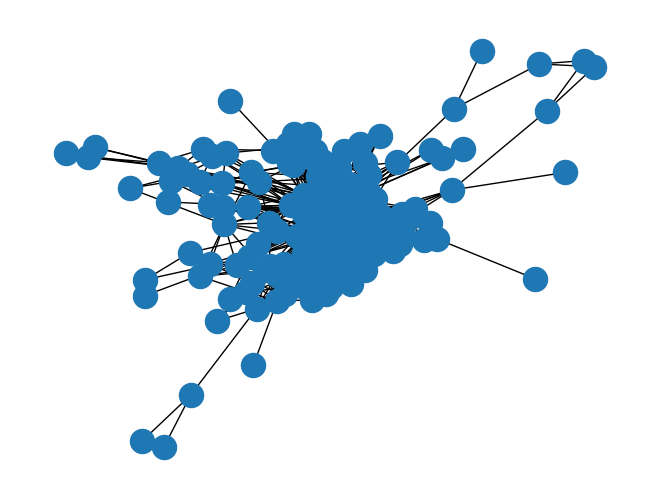

In [22]:
nx.draw(G)

In [ ]:
params = { 
          "width": 50, 
          "height": 50,
          "vision_min": range(1,3),
          "metabolism_max": [3,5]
        }

results_batch = mesa.batch_run(
    SugarscapeG1mt,
    parameters = params,
    iterations = 1,
    number_processes = 1,
    data_collection_period = 1,
    display_progress = True
)